In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preprocessing 


In [2]:
county_df = pd.read_pickle("../Data/county_data_totals.pkl")
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3087 entries, 1001.0 to 56045.0
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            3087 non-null   float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      3087 non-null   float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   3087 non-null   float64
 3   Population, Census, April 1, 2010                                                       3087 non-null   float64
 4   Persons under 5 years, percent                                                          3086 non-null   float64
 5   Persons under 18 years, percent                            

In [3]:
first_features_test_df = county_df.copy().drop(['Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)'\
                                                , 'Native Hawaiian and Other Pacific Islander alone, percent(a)', 'Building permits, 2019'\
                                                , 'Minority-owned firms, 2012', 'Veteran-owned firms, 2012', 'Total accommodation and food services sales, 2012 ($1,000)(c)'\
                                                , 'Total manufacturers shipments, 2012 ($1,000)(c)', 'Total merchant wholesaler sales, 2012 ($1,000)(c)'], axis=1).dropna()

first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2980 entries, 1001.0 to 56045.0
Data columns (total 57 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            2980 non-null   float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      2980 non-null   float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   2980 non-null   float64
 3   Population, Census, April 1, 2010                                                       2980 non-null   float64
 4   Persons under 5 years, percent                                                          2980 non-null   float64
 5   Persons under 18 years, percent                            

In [4]:
first_features_test_df.drop(first_features_test_df.columns[[1, 2, 3, 7, 20, 21, 28, 34, 39, 40, 53, 54, 55]], axis=1, inplace=True)
first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2980 entries, 1001.0 to 56045.0
Data columns (total 44 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            2980 non-null   float64
 1   Persons under 5 years, percent                                                          2980 non-null   float64
 2   Persons under 18 years, percent                                                         2980 non-null   float64
 3   Persons 65 years and over, percent                                                      2980 non-null   float64
 4   White alone, percent                                                                    2980 non-null   float64
 5   Black or African American alone, percent(a)                

In [5]:
# convert deaths to deaths per 100k
first_features_test_df['Deaths per 100k'] = 1e5*first_features_test_df['deaths']/first_features_test_df['Population estimates, July 1, 2019,  (V2019)']
first_features_test_df.drop(['deaths'], axis=1, inplace=True)
first_features_test_df

Population estimates, July 1, 2019,  (V2019)  \
1001.0                                        55869.0   
1003.0                                       223234.0   
1005.0                                        24686.0   
1007.0                                        22394.0   
1009.0                                        57826.0   
...                                               ...   
56037.0                                       42343.0   
56039.0                                       23464.0   
56041.0                                       20226.0   
56043.0                                        7805.0   
56045.0                                        6927.0   

         Persons under 5 years, percent  Persons under 18 years, percent  \
1001.0                              5.9                             23.2   
1003.0                              5.4                             21.3   
1005.0                              5.3                             20.6   
1007.0                              5.6                             20.3   
1009.0                              5.9                             22.9   
...                                 ...                              ...   
56037.0                             6.6                             25.9   
56039.0                             4.8                             17.9   
56041.0                             6.7                             28.4   
56043.0                             5.1                             22.9   
56045.0                             5.1                             20.4   

         Persons 65 years and over, percent  White alone, percent  \
1001.0                                 16.0                  76.3   
1003.0                                 21.0                  87.4   
1005.0                                 19.7                  49.2   
1007.0                                 16.7                  76.8   
1009.0                                 18.7                  95.8   
...                                     ...                   ...   
56037.0                                13.0                  93.8   
56039.0                                15.8                  95.0   
56041.0                                15.0                  95.3   
56043.0                                22.2                  94.5   
56045.0                                21.3                  93.2   

         Black or African American alone, percent(a)  \
1001.0                                          20.1   
1003.0                                           8.8   
1005.0                                          48.2   
1007.0                                          21.3   
1009.0                                           1.7   
...                                              ...   
56037.0                                          1.4   
56039.0                                          0.7   
56041.0                                          0.8   
56043.0                                          0.6   
56045.0                                          0.7   

         American Indian and Alaska Native alone, percent(a)  \
1001.0                                                 0.5     
1003.0                                                 0.8     
1005.0                                                 0.7     
1007.0                                                 0.5     
1009.0                                                 0.6     
...                                                    ...     
56037.0                                                1.5     
56039.0                                                0.9     
56041.0                                                1.4     
56043.0                                                1.8     
56045.0                                                1.9     

         Asian alone, percent(a)  Two or More Races, percent  \
1001.0                       1.2                         1.9   
1003.0      

In [6]:
# drop rows with exactly 0 deaths
first_features_test_df.drop(first_features_test_df[first_features_test_df['Deaths per 100k'] == 0].index, inplace = True) 
first_features_test_df

Population estimates, July 1, 2019,  (V2019)  \
1001.0                                        55869.0   
1003.0                                       223234.0   
1005.0                                        24686.0   
1007.0                                        22394.0   
1009.0                                        57826.0   
...                                               ...   
56037.0                                       42343.0   
56039.0                                       23464.0   
56041.0                                       20226.0   
56043.0                                        7805.0   
56045.0                                        6927.0   

         Persons under 5 years, percent  Persons under 18 years, percent  \
1001.0                              5.9                             23.2   
1003.0                              5.4                             21.3   
1005.0                              5.3                             20.6   
1007.0                              5.6                             20.3   
1009.0                              5.9                             22.9   
...                                 ...                              ...   
56037.0                             6.6                             25.9   
56039.0                             4.8                             17.9   
56041.0                             6.7                             28.4   
56043.0                             5.1                             22.9   
56045.0                             5.1                             20.4   

         Persons 65 years and over, percent  White alone, percent  \
1001.0                                 16.0                  76.3   
1003.0                                 21.0                  87.4   
1005.0                                 19.7                  49.2   
1007.0                                 16.7                  76.8   
1009.0                                 18.7                  95.8   
...                                     ...                   ...   
56037.0                                13.0                  93.8   
56039.0                                15.8                  95.0   
56041.0                                15.0                  95.3   
56043.0                                22.2                  94.5   
56045.0                                21.3                  93.2   

         Black or African American alone, percent(a)  \
1001.0                                          20.1   
1003.0                                           8.8   
1005.0                                          48.2   
1007.0                                          21.3   
1009.0                                           1.7   
...                                              ...   
56037.0                                          1.4   
56039.0                                          0.7   
56041.0                                          0.8   
56043.0                                          0.6   
56045.0                                          0.7   

         American Indian and Alaska Native alone, percent(a)  \
1001.0                                                 0.5     
1003.0                                                 0.8     
1005.0                                                 0.7     
1007.0                                                 0.5     
1009.0                                                 0.6     
...                                                    ...     
56037.0                                                1.5     
56039.0                                                0.9     
56041.0                                                1.4     
56043.0                                                1.8     
56045.0                                                1.9     

         Asian alone, percent(a)  Two or More Races, percent  \
1001.0                       1.2                         1.9   
1003.0      

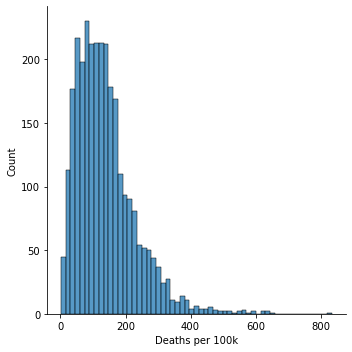

In [7]:
sns.displot(first_features_test_df['Deaths per 100k'])

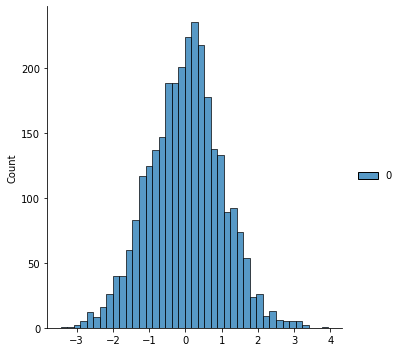

In [8]:
# look at transformations on target variable
pt_boxcox = preprocessing.PowerTransformer(method='box-cox', standardize=True)
sns.displot(pt_boxcox.fit_transform(first_features_test_df[['Deaths per 100k']]))

In [9]:
# apply transformation to target variable
first_features_test_df['Deaths per 100k, trans'] = pt_boxcox.fit_transform(first_features_test_df[['Deaths per 100k']])
first_features_test_df.drop(['Deaths per 100k'], axis=1, inplace=True)
first_features_test_df

Population estimates, July 1, 2019,  (V2019)  \
1001.0                                        55869.0   
1003.0                                       223234.0   
1005.0                                        24686.0   
1007.0                                        22394.0   
1009.0                                        57826.0   
...                                               ...   
56037.0                                       42343.0   
56039.0                                       23464.0   
56041.0                                       20226.0   
56043.0                                        7805.0   
56045.0                                        6927.0   

         Persons under 5 years, percent  Persons under 18 years, percent  \
1001.0                              5.9                             23.2   
1003.0                              5.4                             21.3   
1005.0                              5.3                             20.6   
1007.0                              5.6                             20.3   
1009.0                              5.9                             22.9   
...                                 ...                              ...   
56037.0                             6.6                             25.9   
56039.0                             4.8                             17.9   
56041.0                             6.7                             28.4   
56043.0                             5.1                             22.9   
56045.0                             5.1                             20.4   

         Persons 65 years and over, percent  White alone, percent  \
1001.0                                 16.0                  76.3   
1003.0                                 21.0                  87.4   
1005.0                                 19.7                  49.2   
1007.0                                 16.7                  76.8   
1009.0                                 18.7                  95.8   
...                                     ...                   ...   
56037.0                                13.0                  93.8   
56039.0                                15.8                  95.0   
56041.0                                15.0                  95.3   
56043.0                                22.2                  94.5   
56045.0                                21.3                  93.2   

         Black or African American alone, percent(a)  \
1001.0                                          20.1   
1003.0                                           8.8   
1005.0                                          48.2   
1007.0                                          21.3   
1009.0                                           1.7   
...                                              ...   
56037.0                                          1.4   
56039.0                                          0.7   
56041.0                                          0.8   
56043.0                                          0.6   
56045.0                                          0.7   

         American Indian and Alaska Native alone, percent(a)  \
1001.0                                                 0.5     
1003.0                                                 0.8     
1005.0                                                 0.7     
1007.0                                                 0.5     
1009.0                                                 0.6     
...                                                    ...     
56037.0                                                1.5     
56039.0                                                0.9     
56041.0                                                1.4     
56043.0                                                1.8     
56045.0                                                1.9     

         Asian alone, percent(a)  Two or More Races, percent  \
1001.0                       1.2                         1.9   
1003.0      

In [10]:
corr_mat = first_features_test_df.corr()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(corr_mat)

                                                    Population estimates, July 1, 2019,  (V2019)  \
Population estimates, July 1, 2019,  (V2019)                                            1.000000   
Persons under 5 years, percent                                                          0.056538   
Persons under 18 years, percent                                                         0.032913   
Persons 65 years and over, percent                                                     -0.217185   
White alone, percent                                                                   -0.151786   
Black or African American alone, percent(a)                                             0.074322   
American Indian and Alaska Native alone, percen...                                     -0.041830   
Asian alone, percent(a)                                                                 0.495556   
Two or More Races, percent                                                              0.145895   


In [11]:
highly_correlated_features = []
high_corr_vals = []

for index,value in corr_mat['Deaths per 100k, trans'].iteritems():
    if(abs(value) >= 0.15):
        highly_correlated_features.append(index)
        high_corr_vals.append(value)
        
for i, name in enumerate(highly_correlated_features):
    print(name, high_corr_vals[i])

Persons under 5 years, percent 0.15708796711348338
White alone, percent -0.15689908352710807
Black or African American alone, percent(a) 0.21215829986317322
Asian alone, percent(a) -0.18001339166420674
Two or More Races, percent -0.27654951874667805
White alone, not Hispanic or Latino, percent -0.19015713572522183
Median value of owner-occupied housing units, 2015-2019 -0.3726197890992761
Median gross rent, 2015-2019 -0.3333402221387504
Living in same house 1 year ago, percent of persons age 1 year+, 2015-2019 0.19230297018671458
Households with a computer, percent, 2015-2019 -0.3565468782044498
High school graduate or higher, percent of persons age 25 years+, 2015-2019 -0.28462096877467796
Bachelor's degree or higher, percent of persons age 25 years+, 2015-2019 -0.3204493195391924
Persons  without health insurance, under age 65 years, percent 0.19613572737916551
Median household income (in 2019 dollars), 2015-2019 -0.29039210895009976
Deaths per 100k, trans 1.0


In [12]:
first_features_test_df = first_features_test_df[first_features_test_df.columns.intersection(highly_correlated_features)]
first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2931 entries, 1001.0 to 56045.0
Data columns (total 15 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Persons under 5 years, percent                                               2931 non-null   float64
 1   White alone, percent                                                         2931 non-null   float64
 2   Black or African American alone, percent(a)                                  2931 non-null   float64
 3   Asian alone, percent(a)                                                      2931 non-null   float64
 4   Two or More Races, percent                                                   2931 non-null   float64
 5   White alone, not Hispanic or Latino, percent                                 2931 non-null   float64
 6   Median value of owner-occupied

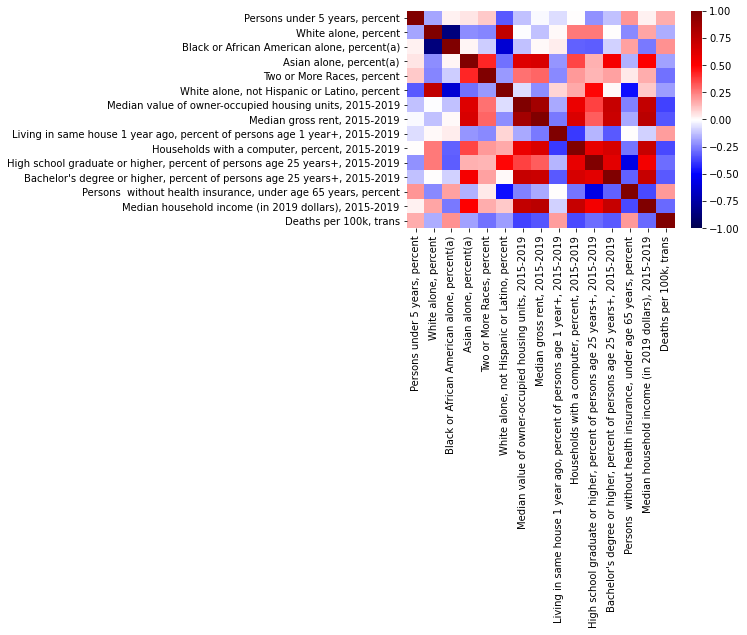

In [13]:
sns.heatmap(first_features_test_df.corr(), cmap="seismic", vmin=-1, vmax=1);


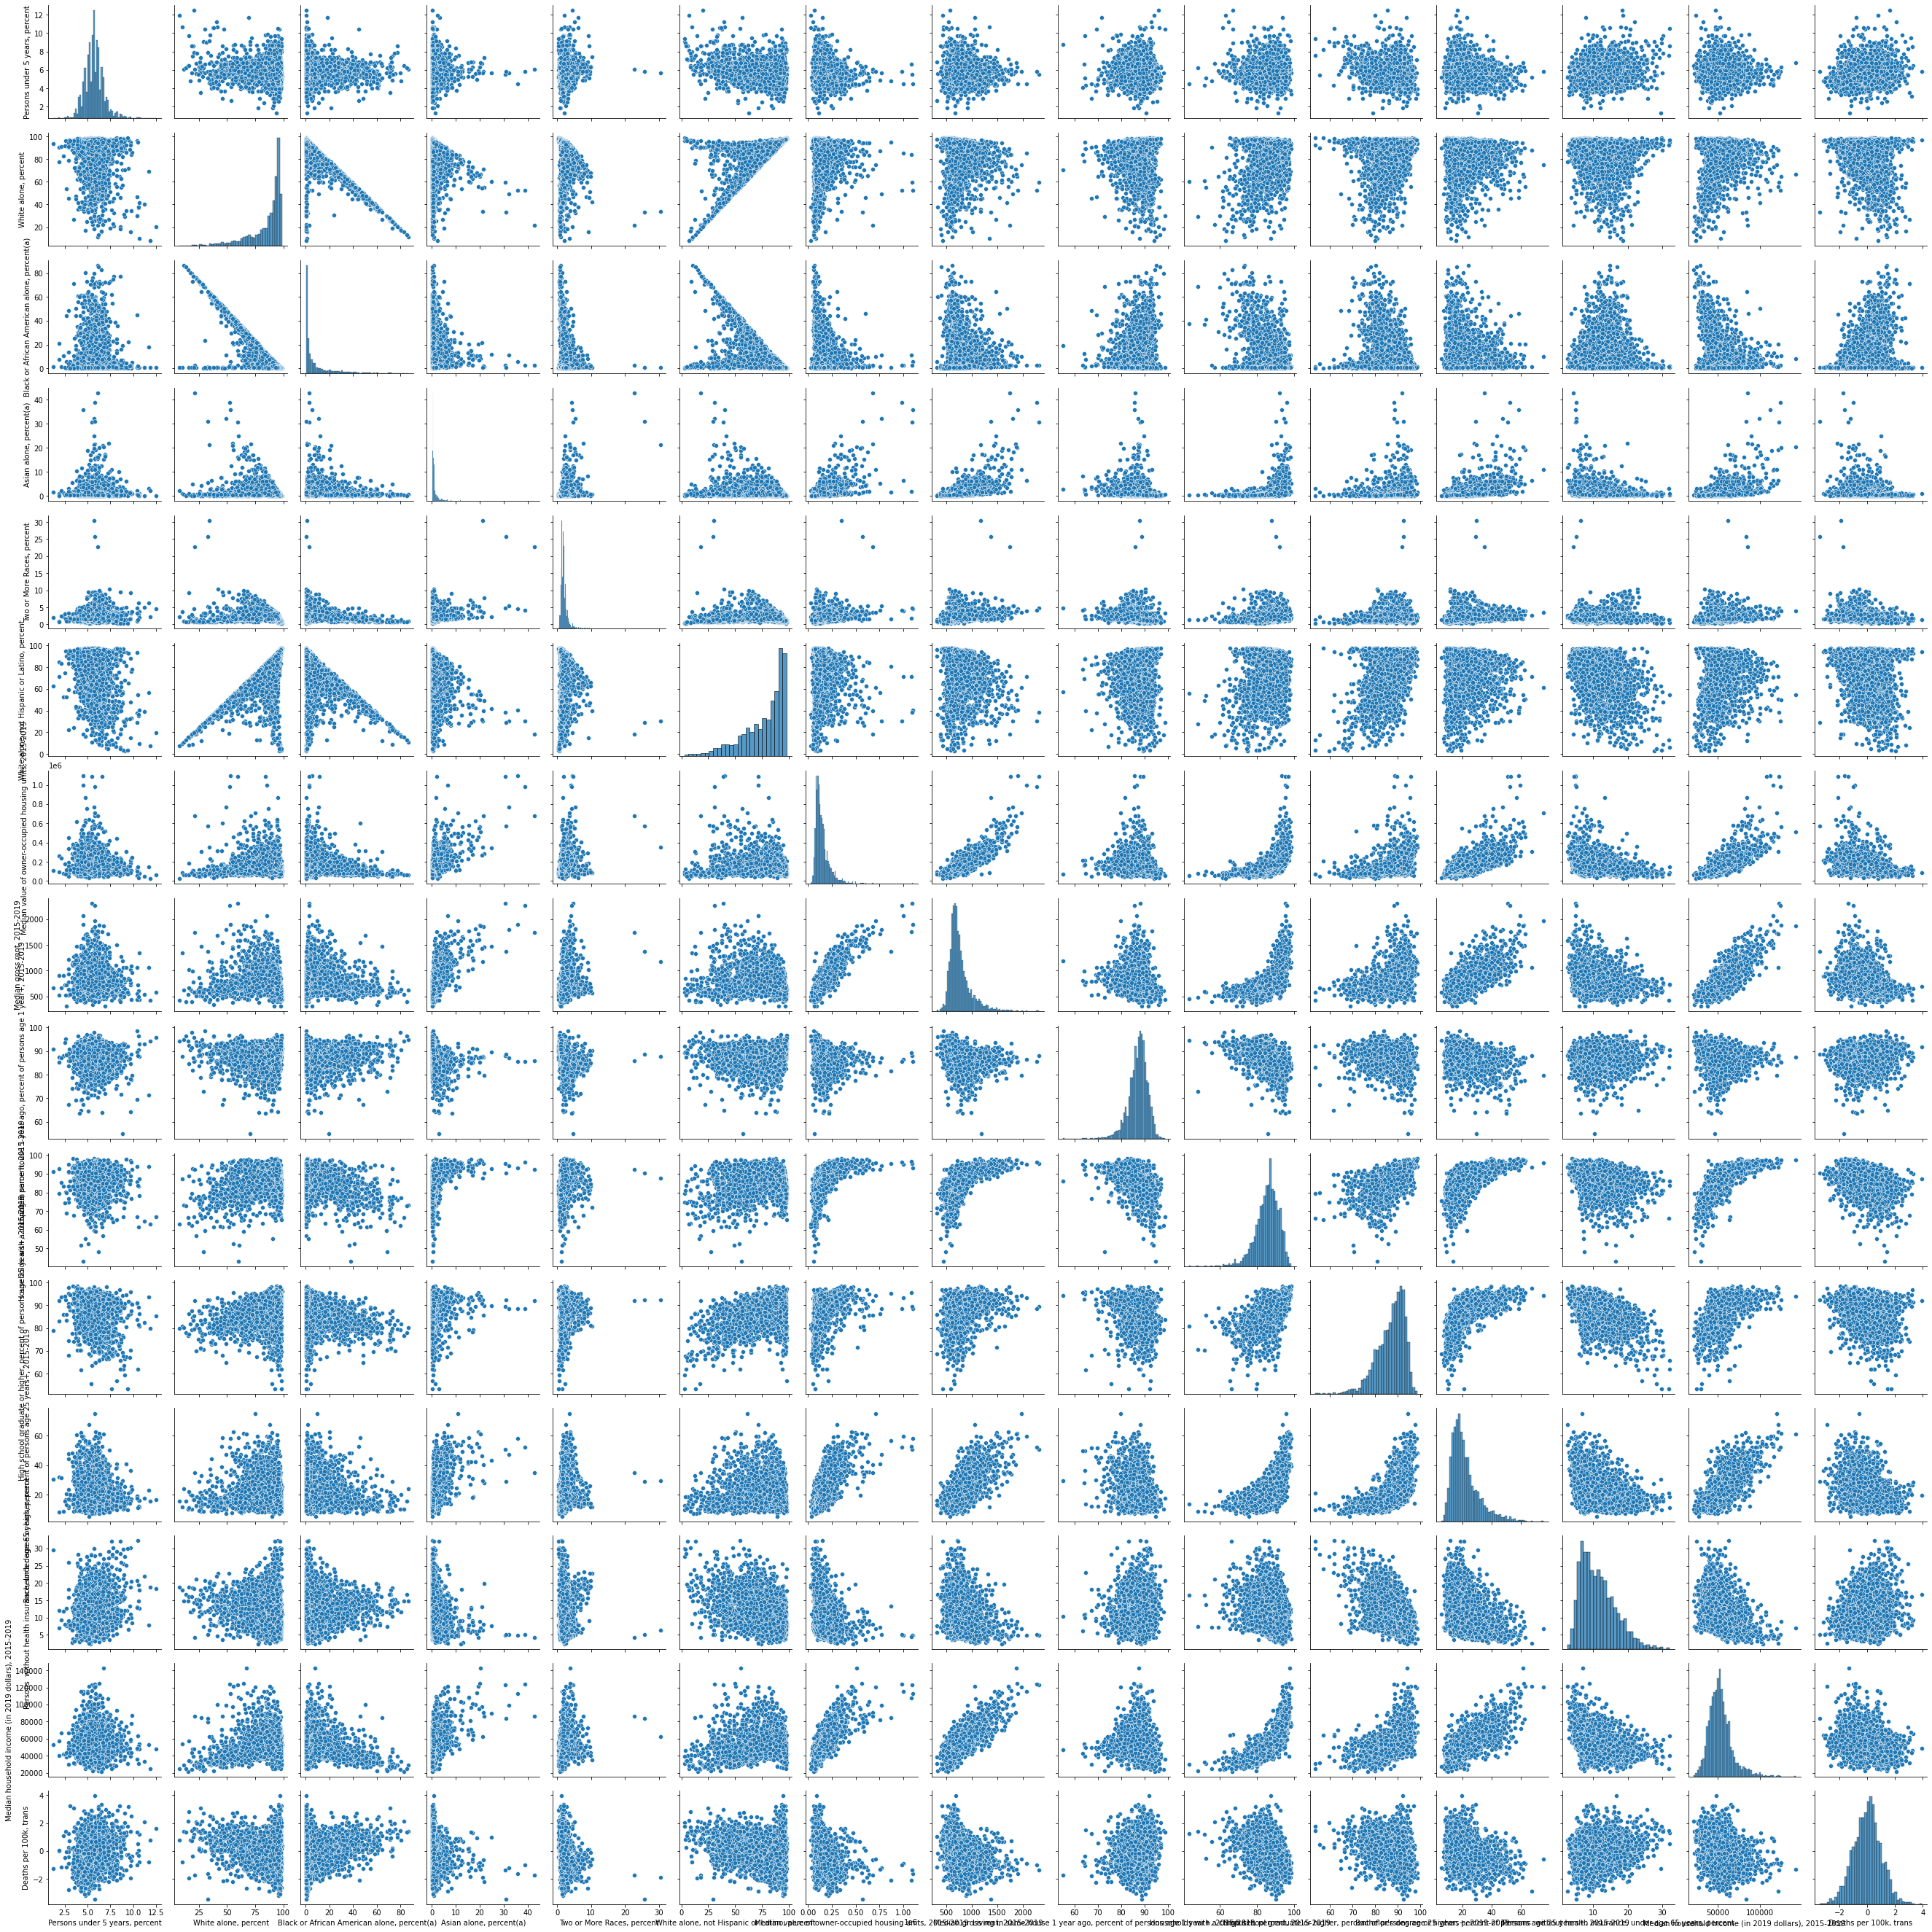

In [14]:
sns.pairplot(first_features_test_df)#, height=1.2, aspect=1.5);

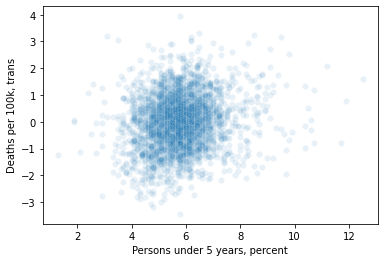

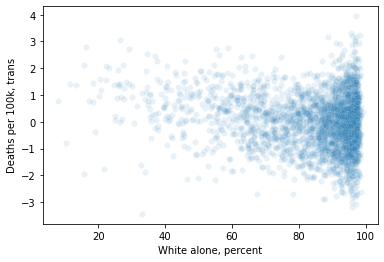

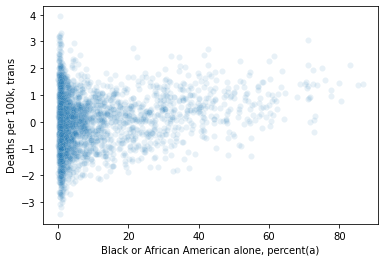

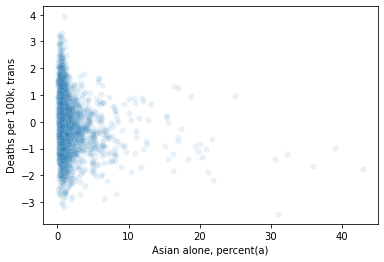

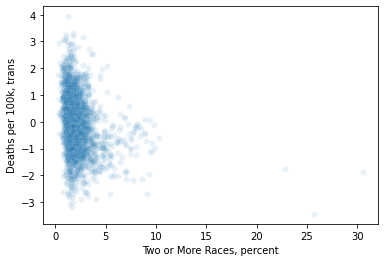

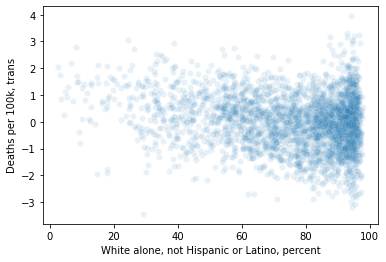

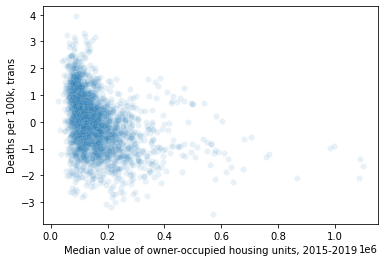

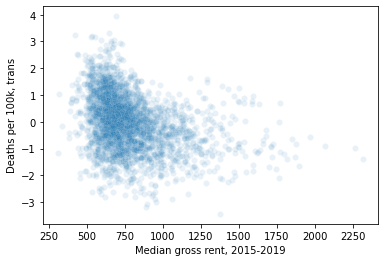

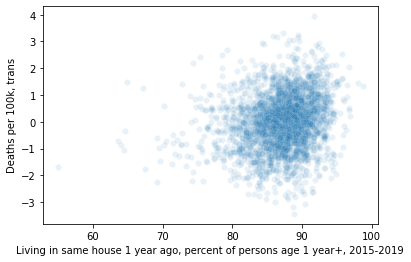

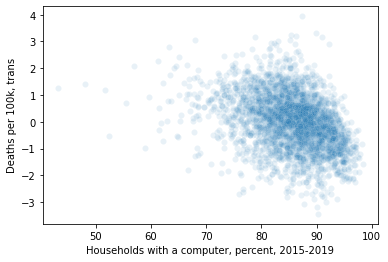

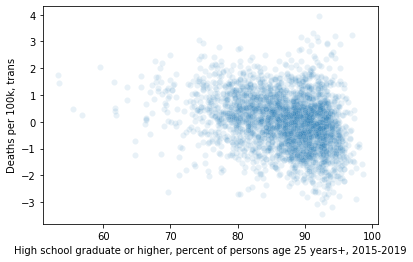

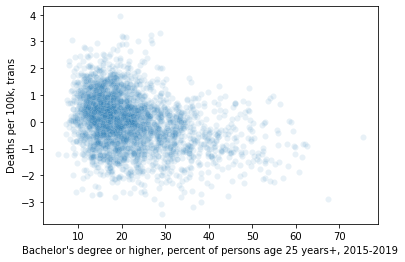

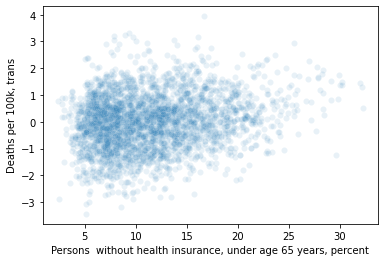

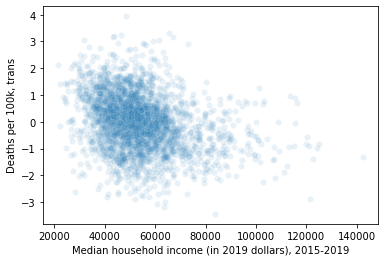

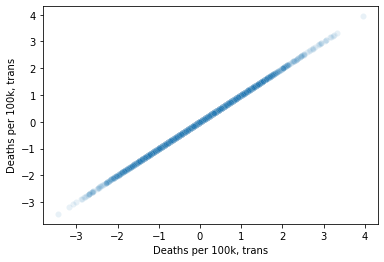

In [15]:
for col in first_features_test_df.columns:
    sns.scatterplot(data=first_features_test_df, alpha=.1, x=col, y='Deaths per 100k, trans')
    plt.show()

In [16]:
X, y = first_features_test_df.drop('Deaths per 100k, trans',axis=1), first_features_test_df['Deaths per 100k, trans']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=110) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state = 715)
cv_lm_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(round(lm.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_lm_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Simple regression scores:  [0.253, 0.271, 0.27, 0.308, 0.217] 

Simple mean cv r^2: 0.264 +- 0.029


In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_poly_r2s = []

for train_ind, val_ind in kf.split(X,y):    

    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #poly with degree 2
    poly = preprocessing.PolynomialFeatures(degree=2)

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(round(lm_poly.score(X_val_poly, y_val), 3))
    
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

Poly scores:  [0.327, 0.233, 0.227, 0.159, 0.328] 

Poly mean cv r^2: 0.255 +- 0.065


In [19]:
# kf = KFold(n_splits=5, shuffle=True, random_state = 315)
# cv_lm_pois_r2s = [] #collect the validation results

# for train_ind, val_ind in kf.split(X,y):
    
#     X_train, y_train = X[train_ind], y[train_ind]
#     X_val, y_val = X[val_ind], y[val_ind] 
    
#     #simple linear regression
#     pr = PoissonRegressor()#max_iter=1000)

#     pr.fit(X_train, y_train)
#     cv_lm_pois_r2s.append(round(pr.score(X_val, y_val), 3))

# print('Poisson regression scores: ', cv_lm_pois_r2s, '\n')

# print(f'Poisson mean cv r^2: {np.mean(cv_lm_pois_r2s):.3f} +- {np.std(cv_lm_pois_r2s):.3f}')